<a href="https://colab.research.google.com/github/ezetimibe/machine_learning_stroke_data/blob/main/Kaggle_stroke_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING OF KAGGLE STROKE DATASET USING KNN-CLASSIFIER

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


Starting with exploration of the dataset

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.shape

(5110, 12)

We need to drop the gender='Other' row, since it only occurred once in the data and will affect the training of the model


In [ ]:
# df = data.drop(columns='gender', index='Other')
# df = data.drop(index=('gender', 'Other'), axis=1)
# df = data.drop()
data.gender.index

RangeIndex(start=0, stop=5110, step=1)

In [ ]:
# data.gender.value_counts().Other.row()
# data.gender.values==Other
# for i in range(len(data.gender)):
#   if data.gender[i] == 'Other':
#     print(data.gender[i].index)
for i in data.index:
  if data.gender[i] == 'Other':
    print(i)

3116


In [ ]:
df = data.drop(index=3116)
df.shape

(5109, 12)

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

The dataset has 5110 rows and 12 columns, 4-int columns, 3 float columns and 5 object columns 

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


For data preprocessing, parameters that will bw regarded as very important to us for stroke detection are parameters which are medically considered risk factors for developing stroke. These include; 'gender', 'age', 'hypertension', 'heart disease', 'avg_glucose_level', 'bmi', 'smoking status.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

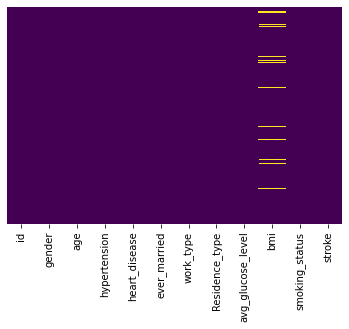

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
df.bmi = imp.fit_transform(df[['bmi']])


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# df.describe()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


In [ ]:
features = df.loc[:, ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]
target = df.stroke
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.25, shuffle=True)
feature_train.shape
feature_test.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
3127,Male,32.0,0,0,56.08,35.9,formerly smoked
3784,Female,63.0,0,1,86.21,39.1,never smoked
967,Male,21.0,0,0,102.05,29.9,never smoked
5101,Female,45.0,0,0,97.95,24.5,Unknown
3489,Female,68.0,0,0,233.59,43.9,never smoked


In [ ]:
# x = df.loc[:,['hypertension','heart_disease','bmi', 'avg_glucose_level']]
# scale = StandardScaler()
# x_scaled = scale.fit_transform(x)
# y = df.stroke
# trial_model = KNeighborsClassifier()
# x_scaled_file = pd.DataFrame(x_scaled, columns=x.columns)
# cross_val_score(trial_model, x_scaled,y, cv=5, scoring='accuracy').mean()
# y.value_counts(normalize=True)

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)

In [ ]:
scaler = StandardScaler()

In [ ]:
# ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(df[['smoking_status']])
column_trans = make_column_transformer((OneHotEncoder(), ['gender', 'smoking_status']), remainder='passthrough')


In [ ]:
pipe = make_pipeline(column_trans, scaler, model)
cross_val_score(pipe, feature_train, target_train, cv = 5, scoring='accuracy').mean()

0.9488376605471796

In [ ]:
pipe.fit(feature_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_status'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
pipe.predict(feature_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
target_test

3127    0
3784    0
967     0
5101    0
3489    0
       ..
1730    0
3424    0
1739    0
3168    0
3843    0
Name: stroke, Length: 1278, dtype: int64

In [ ]:
# neighbors_range = range(1, 21)
# # param_grid = dict(kneighborsclassifier__n_neighbors = neighbors_range)
# param_grid = dict(kneighborsclassifier__n_neighbors=neighbors_range)
# grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
# grid.fit(feature_train, target_train)
# grid.best_score_
# grid.best_params_

{'kneighborsclassifier__n_neighbors': 10}